VIDEO LINK :
https://www.youtube.com/watch?v=GrJP9FLV3FE

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix



# 1. Data Visualization

In [2]:
df = pd.read_csv('Telco_customer_churn.csv')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


# DROP Meaningless Feature Column for Prediction

In [3]:
df.drop(['CustomerID','Lat Long','Churn Label','Churn Score','CLTV','Churn Reason'],axis=1,inplace=True)

df.head()

,Count,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,United States,California,Los Angeles,90003,33.964131,-118.272783,Male,No,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,1,United States,California,Los Angeles,90005,34.059281,-118.307420,Female,No,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,1,United States,California,Los Angeles,90006,34.048013,-118.293953,Female,No,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,1,United States,California,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,1,United States,California,Los Angeles,90015,34.039224,-118.266293,Male,No,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


# 2. Data Cleaning

In [4]:
df.isna().sum()

Count                0
Country              0
State                0
City                 0
Zip Code             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Latitude           7043 non-null   float64
 6   Longitude          7043 non-null   float64
 7   Gender             7043 non-null   object 
 8   Senior Citizen     7043 non-null   object 
 9   Partner            7043 non-null   object 
 10  Dependents         7043 non-null   object 
 11  Tenure Months      7043 non-null   int64  
 12  Phone Service      7043 non-null   object 
 13  Multiple Lines     7043 non-null   object 
 14  Internet Service   7043 non-null   object 
 15  Online Security    7043 non-null   object 
 16  Online Backup      7043 

Filter Check and Remove Feature COlumn of single unique value 

In [6]:
column_name=df.columns
single_class_column_list=[]

for name in column_name:
    if len(df[name].unique())==1:
        single_class_column_list=np.append(single_class_column_list,name)
    elif len(df[name].unique())==2 and np.nan in(df[name].unique()):
        single_class_column_list=np.append(single_class_column_list,name)
  
        
    print(name+' :',df[name].unique(),'\n')
    
print('single_class_column_list :',single_class_column_list)

Count : [1] 

Country : ['United States'] 

State : ['California'] 

City : ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley'] 

Zip Code : [90003 90005 90006 ... 96128 96134 96146] 

Latitude : [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797] 

Longitude : [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401] 

Gender : ['Male' 'Female'] 

Senior Citizen : ['No' 'Yes'] 

Partner : ['No' 'Yes'] 

Dependents : ['No' 'Yes'] 

Tenure Months : [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0] 

Phone Service : ['Yes' 'No'] 

Multiple Lines : ['No' 'Yes' 'No phone service'] 

Internet Service : ['DSL' 'Fiber optic' 'No'] 

Online Security : ['Yes' 'No' 'No internet service'] 

Online Backup : ['Yes' 'No' 'No internet service'] 

Device 

In [7]:
df.drop(single_class_column_list,axis=1,inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1





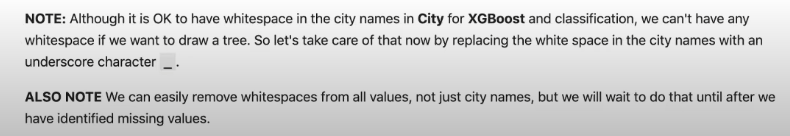


In [8]:
print(df['City'].unique())

['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']


Replace the blank space of city to "_"

In [9]:
df['City'].replace(' ','_',regex=True,inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


We also need to eliminate the whitespace in the column names , so we'll replace it with underscores

In [10]:
df.columns=df.columns.str.replace(' ','_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


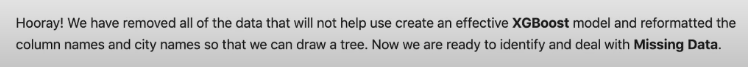


## Data Cleaning

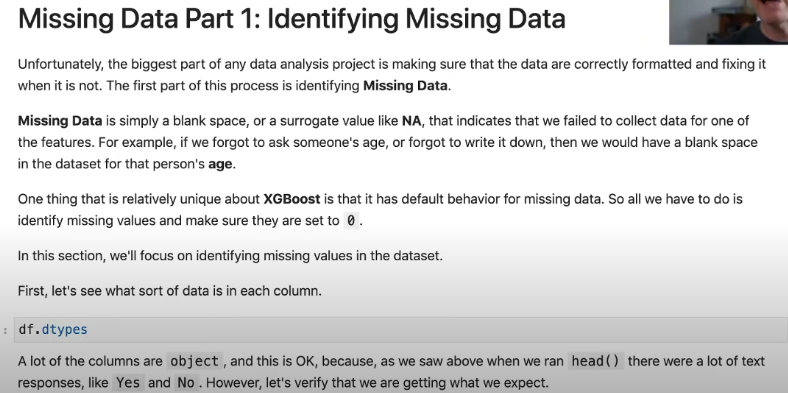

In [11]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

## Check NaN value in each columns row

In [12]:
column_list=df.columns
a=list(df.isna().sum()) # Check NaN value in each columns row
print(column_list)
print(a)


Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Value'],
      dtype='object')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Check is there " blank space " in rows of each column

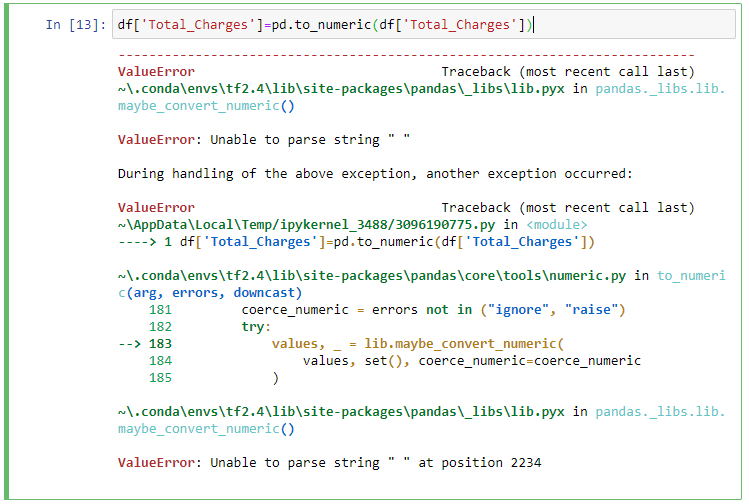

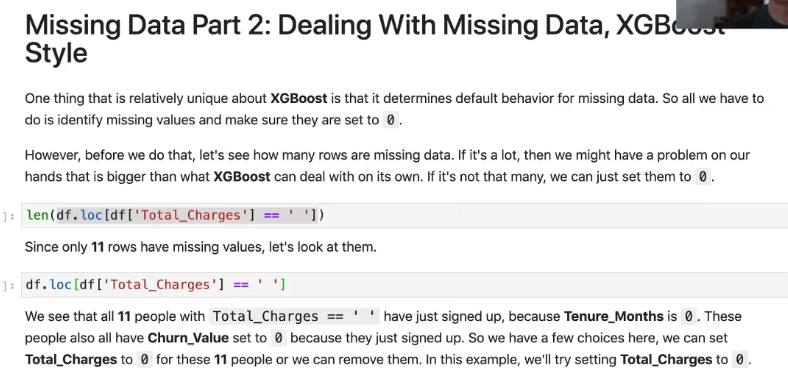

## Check and filter Missing Data " Empty Space rows"

In [13]:
empty_space_column={} # Store Empty Space row in dictionary by column name

for column in column_list:
    if len(df.loc[df[column]==' '])!= 0 :
        empty_space_column[column]=df.loc[df[column]==' '].index # index 
           
print(empty_space_column)


{'Total_Charges': Int64Index([2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840], dtype='int64')}


## Replace Missing Data
Loop thru dictionary to replace "empty space" to other value 

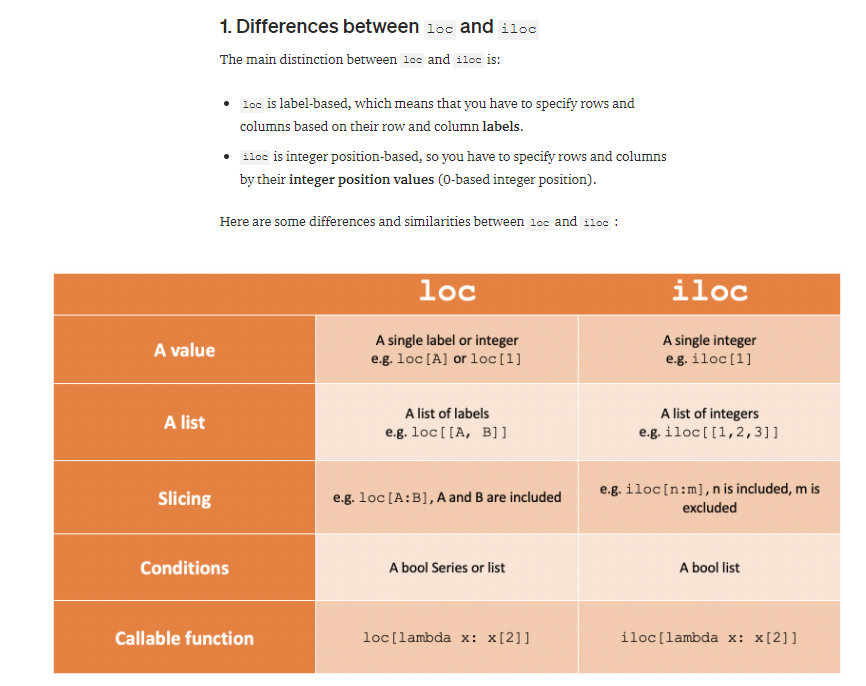

In [14]:
# locate dataframe by column and index using empty_space_column dictionary variable

if len(empty_space_column)!=0 : # check empty_space_column dictionary is empty or not
    
    for key in empty_space_column.keys():
        print(key)
        df.loc[empty_space_column[key],key]=0 # df.loc[idx list, column name] = 0

    

Total_Charges


In [15]:
 df.iloc[empty_space_column[key]]  # check the empty space is replace with 0

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


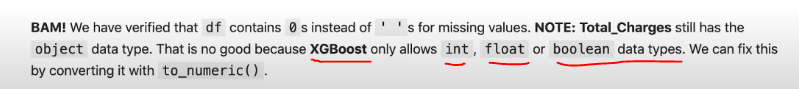

In [16]:
df['Total_Charges']=pd.to_numeric(df['Total_Charges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip_Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior_Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure_Months      7043 non-null   int64  
 9   Phone_Service      7043 non-null   object 
 10  Multiple_Lines     7043 non-null   object 
 11  Internet_Service   7043 non-null   object 
 12  Online_Security    7043 non-null   object 
 13  Online_Backup      7043 non-null   object 
 14  Device_Protection  7043 non-null   object 
 15  Tech_Support       7043 non-null   object 
 16  Streaming_TV       7043 

In [17]:
df.replace(' ','_',regex=True,inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


# 3. Model Training

In [18]:
X=df.drop('Churn_Value',axis=1)
Y=df['Churn_Value']
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip_Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior_Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure_Months      7043 non-null   int64  
 9   Phone_Service      7043 non-null   object 
 10  Multiple_Lines     7043 non-null   object 
 11  Internet_Service   7043 non-null   object 
 12  Online_Security    7043 non-null   object 
 13  Online_Backup      7043 non-null   object 
 14  Device_Protection  7043 non-null   object 
 15  Tech_Support       7043 non-null   object 
 16  Streaming_TV       7043 

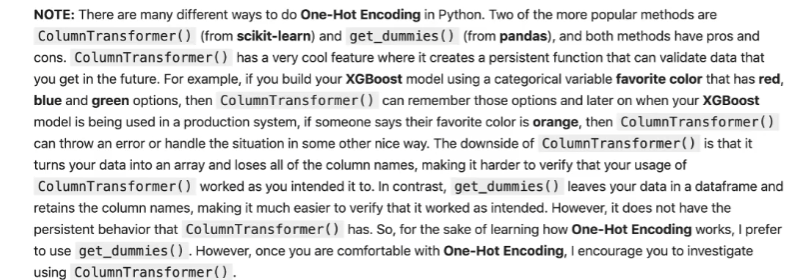
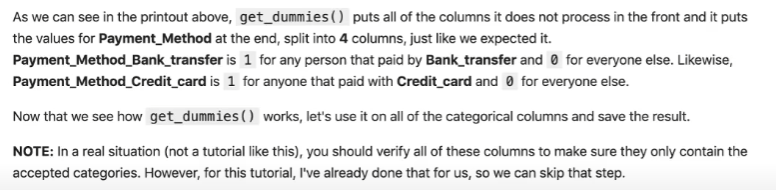
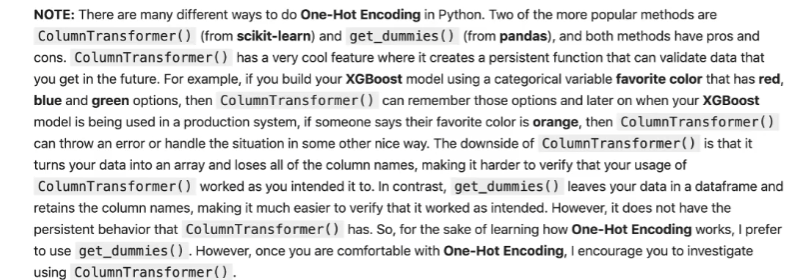
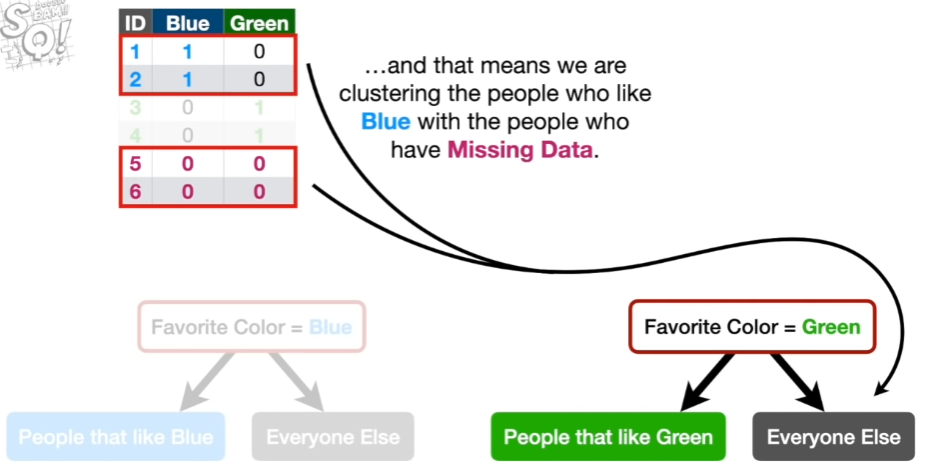
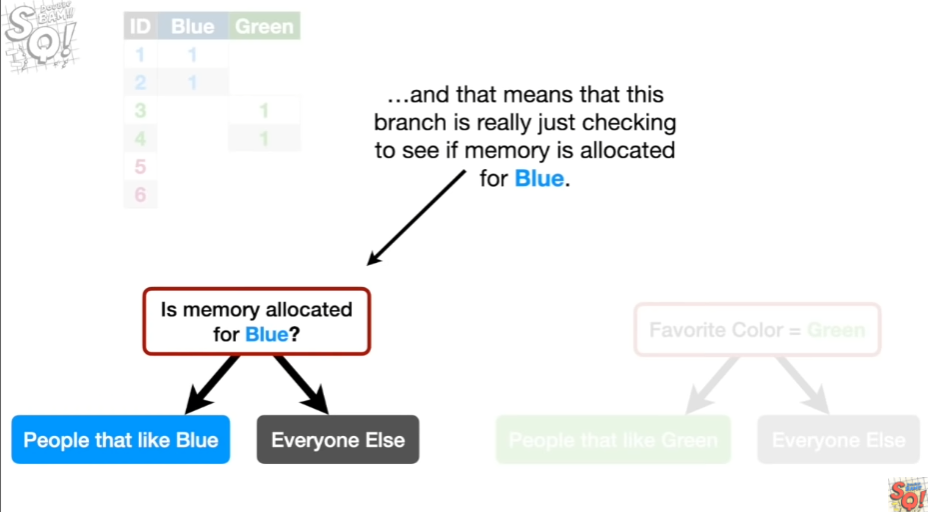

In [20]:
# xgbOOST 
# PREVIOUS MISSING DATA IS ALLOCATE WITH VALUE "0"
# XGBoost use Sparse Matrices which only store memory of value other than "0"
# Hence "0" is not store as memory
# Hence in XGBoost doesnt require to drop_first for one Hot encoder
# all column remains so that XGBoost can deals with missing data when both column's row are 0 at the same time meaning its missing data row

In [21]:
# Convert Object type (Categorical) features into sperate features thru pd.get_dummies()
X_encoded=pd.get_dummies(X,columns=['City',
                                    'Gender',
                                    'Senior_Citizen',
                                    'Partner',
                                    'Dependents',
                                    'Phone_Service',
                                    'Multiple_Lines',
                                    'Internet_Service',
                                    'Online_Security',
                                    'Online_Backup',
                                    'Device_Protection',
                                    'Tech_Support',
                                    'Streaming_TV',
                                    'Streaming_Movies',
                                    'Contract',
                                    'Paperless_Billing',
                                    'Payment_Method'])

X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip_Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior_Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure_Months      7043 non-null   int64  
 9   Phone_Service      7043 non-null   object 
 10  Multiple_Lines     7043 non-null   object 
 11  Internet_Service   7043 non-null   object 
 12  Online_Security    7043 non-null   object 
 13  Online_Backup      7043 non-null   object 
 14  Device_Protection  7043 non-null   object 
 15  Tech_Support       7043 non-null   object 
 16  Streaming_TV       7043 

In [23]:
Y.unique()

array([1, 0], dtype=int64)

## Build A Preliminary XGBoost Model
### Check Imbalance Data
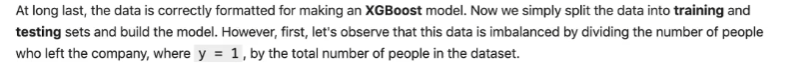

In [24]:
# check if the y label data are balance data or not
# Y = 1 is the number of ppl who left
# only 27% of the label data are people who left and 73% are people who didnt left
# Data are imbalanced.
# Need to process imbalance data so that when training probability that Y=0 doesnt all went to training dataset only
sum(Y)/len(Y)

0.2653698707936959

## For imbalance data split it with stratification method to handle imbalanced data
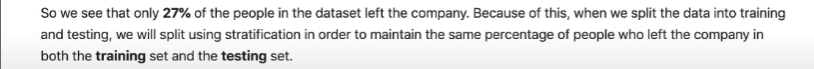


In [25]:
X_train,x_test,Y_train,y_test =train_test_split(X_encoded,Y,random_state=42,stratify=Y)

In [26]:
sum(Y_train)/len(Y_train)

0.2654297614539947

In [27]:
sum(y_test)/len(y_test)

0.26519023282226006

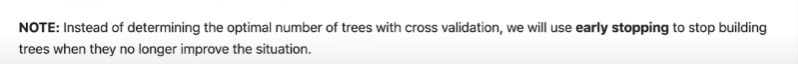

In [28]:
# missing = None = let xgb know what is the value to replace missing value 
# objective = 'binary:logistic'  == xgb predict Y output as logistic regression approach

xgb_clf=xgb.XGBClassifier(objective='binary:logistic',missing=0,seed=42)


In [29]:
xgb_clf.fit(X_train,
            Y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(x_test,y_test)])

[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64414


C:\Users\User\.conda\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[2]	validation_0-aucpr:0.65129
[3]	validation_0-aucpr:0.65054
[4]	validation_0-aucpr:0.65323
[5]	validation_0-aucpr:0.64855
[6]	validation_0-aucpr:0.65460
[7]	validation_0-aucpr:0.65895
[8]	validation_0-aucpr:0.65746
[9]	validation_0-aucpr:0.65851
[10]	validation_0-aucpr:0.66217
[11]	validation_0-aucpr:0.66528
[12]	validation_0-aucpr:0.66322
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66001
[15]	validation_0-aucpr:0.66028
[16]	validation_0-aucpr:0.65781
[17]	validation_0-aucpr:0.65590
[18]	validation_0-aucpr:0.65735
[19]	validation_0-aucpr:0.65857
[20]	validation_0-aucpr:0.65896


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=0, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

# 4. Testing Model

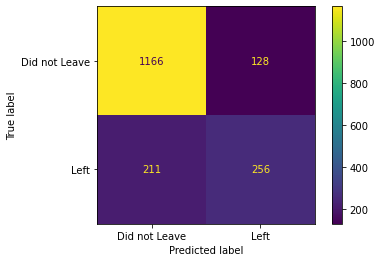

In [30]:
plot_confusion_matrix(xgb_clf,
                      x_test,
                      y_test,
                      values_format='d',
                      display_labels=["Did not Leave","Left"])

# Imbalanced data cause classification result to be bad at predicting minority class

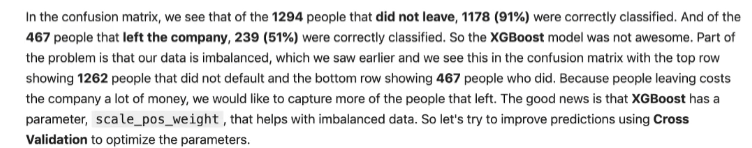

# 5. Optimize Paramter Using Cross Validation and GridSeach()

## IMP !!!
## For imbalance Data use " AUC Score " to evaluate gridsearch hyperparameter



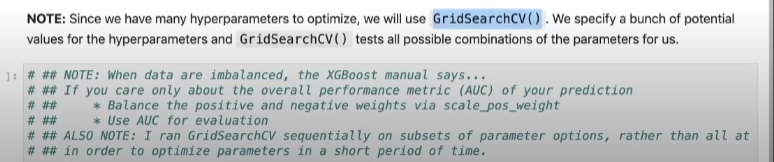
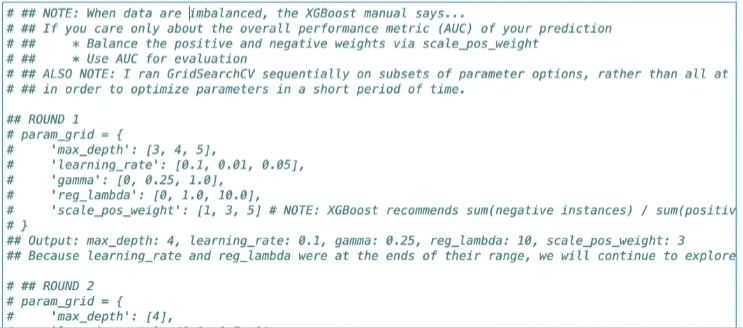
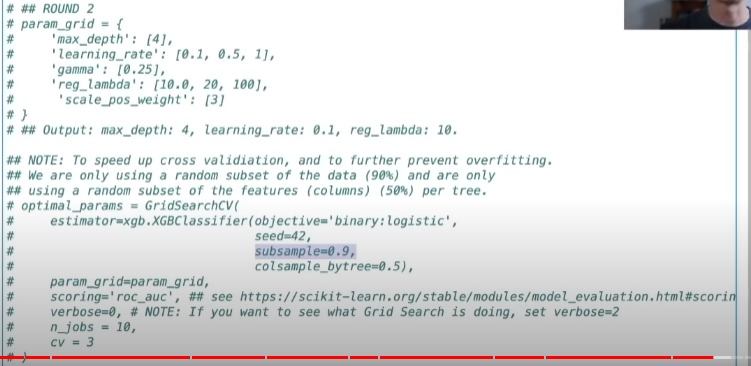


In [31]:
# Hyper Parameter Tuning Run 1

param_grid_1 ={
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5] 
}

optimal_params = GridSearchCV (
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                              seed=42,
                              subsample=0.9, # each subset of dataset use to build each tree only use 90% of random original dataset
                              colsample_bytree=0.5),
    param_grid=param_grid_1,
    scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html
    verbose=2, # if you want to see what grid search is doing, set verbose =2
    n_jobs = 10,
    cv = 3,
)

optimal_params

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=0.9, tree_method=

In [32]:
a=optimal_params.fit(X_train,
                   Y_train,
                   early_stopping_rounds=10,
                   eval_metric='auc',
                   eval_set=[(x_test,y_test)],
                   verbose=False
                  )
a

Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\User\.conda\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=0.9, tree_method=

In [33]:
optimal_params.best_params_

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

In [36]:
tuned_xgb_clf=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                gamma=0.25,
                                learning_rate=0.1,
                                max_depth=4,
                                reg_lambda=10.0,
                                scale_pos_weight=3,
                                subsample=0.9,
                                colsample_bytree=0.5)
tuned_xgb_clf.fit(X_train,
                  Y_train,
                  verbose=True,
                  early_stopping_rounds=10,
                  eval_metric='aucpr',
                  eval_set=[(x_test,y_test)])



[0]	validation_0-aucpr:0.56622
[1]	validation_0-aucpr:0.59525


C:\Users\User\.conda\envs\tf2.4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[2]	validation_0-aucpr:0.62515
[3]	validation_0-aucpr:0.62633
[4]	validation_0-aucpr:0.63192
[5]	validation_0-aucpr:0.63171
[6]	validation_0-aucpr:0.62947
[7]	validation_0-aucpr:0.63056
[8]	validation_0-aucpr:0.63608
[9]	validation_0-aucpr:0.63616
[10]	validation_0-aucpr:0.63627
[11]	validation_0-aucpr:0.65626
[12]	validation_0-aucpr:0.65366
[13]	validation_0-aucpr:0.65374
[14]	validation_0-aucpr:0.65623
[15]	validation_0-aucpr:0.64859
[16]	validation_0-aucpr:0.64615
[17]	validation_0-aucpr:0.64529
[18]	validation_0-aucpr:0.64527
[19]	validation_0-aucpr:0.65224
[20]	validation_0-aucpr:0.64951


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=10.0, scale_pos_weight=3, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

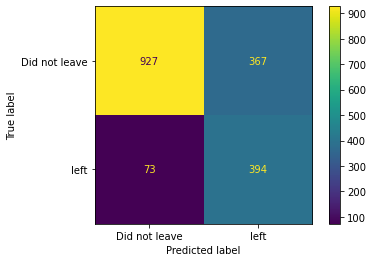

In [43]:
plot_confusion_matrix(tuned_xgb_clf,
                 x_test,
                 y_test,
                 values_format='d',
                 display_labels=["Did not leave","left"])

# 6. Draw XGBoost Tree

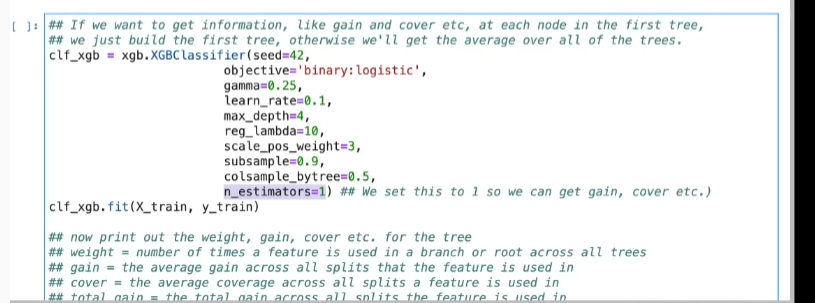
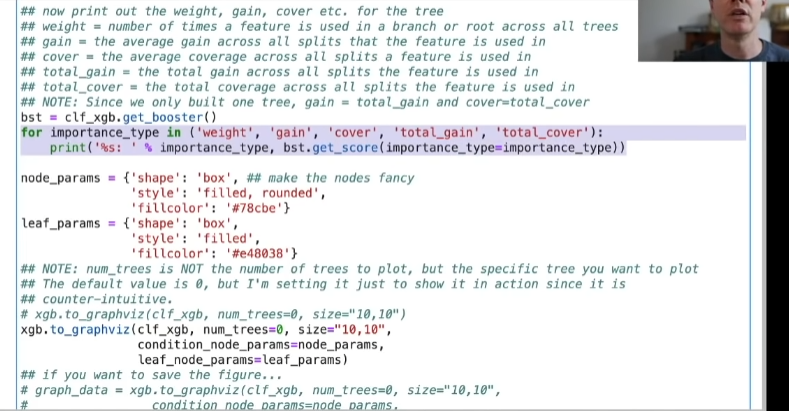
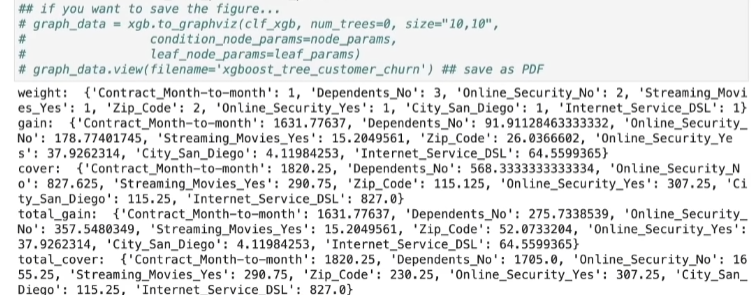

In [50]:
xgb_clf_draw=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                gamma=0.25,
                                learning_rate=0.1,
                                max_depth=4,
                                reg_lambda=10.0,
                                scale_pos_weight=3,
                                subsample=0.9,
                                colsample_bytree=0.5,
                                n_estimators =1)  # build only the 1st estimator or 1st tree
                              
xgb_clf_draw.fit(X_train,
                  Y_train,
                  verbose=True,
                  early_stopping_rounds=10,
                  eval_metric='aucpr',
                  eval_set=[(x_test,y_test)])

bst = xgb_clf_draw.get_booster()

for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s: '%importance_type, bst.get_score(importance_type=importance_type))

    
node_params={'shape':'box',  # make node fancy box type
             'style':'filled,rounded',
             'fillcolor':'#78cbe',} 

leaf_params={'shape':'box',  # make node fancy box type
             'style':'filled',
             'fillcolor':'#e48038',}

xgb.to_graphviz(xgb_clf_draw,
                num_trees=0,
                size="10,10")
#                 condition_node_params==node_params,
#                 leaf_node_params=leaf_params)

[0]	validation_0-aucpr:0.56622
weight:  {'Tech_Support_No': 1, 'Contract_Two_year': 1, 'Internet_Service_Fiber_optic': 1, 'Tenure_Months': 5, 'Monthly_Charges': 2, 'Latitude': 1, 'Internet_Service_DSL': 2, 'Contract_One_year': 1, 'Senior_Citizen_No': 1}
gain:  {'Tech_Support_No': 1133.81055, 'Contract_Two_year': 252.511536, 'Internet_Service_Fiber_optic': 134.158798, 'Tenure_Months': 112.87569578000003, 'Monthly_Charges': 13.62578015, 'Latitude': 6.79351807, 'Internet_Service_DSL': 85.56891250000001, 'Contract_One_year': 13.2877808, 'Senior_Citizen_No': 14.3072205}
cover:  {'Tech_Support_No': 1820.25, 'Contract_Two_year': 742.75, 'Internet_Service_Fiber_optic': 484.0, 'Tenure_Months': 413.95, 'Monthly_Charges': 148.875, 'Latitude': 219.75, 'Internet_Service_DSL': 538.75, 'Contract_One_year': 470.5, 'Senior_Citizen_No': 98.75}
total_gain:  {'Tech_Support_No': 1133.81055, 'Contract_Two_year': 252.511536, 'Internet_Service_Fiber_optic': 134.158798, 'Tenure_Months': 564.3784789000001, 'Mon

ImportError: You must install graphviz to plot tree